<a href="https://colab.research.google.com/github/AlpaslanErdag/Autonomous-Car-2022MLIS2/blob/main/MLiS_AutonomousCar_Project_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!git clone https://github.com/AlpaslanErdag/cardata

fatal: destination path 'cardata' already exists and is not an empty directory.


In [33]:
!ls cardata

1.png  4.png  sampleSubmission.csv  training_norm2.csv
2.png  5.png  test_data		    training_norm3.csv
3.png  6.png  training_data	    training_norm.csv


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam # - Works
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense,Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import glob
import random

In [4]:
datadir= 'cardata'
colums= ['image_id','angle','speed']
data=pd.read_csv(os.path.join(datadir,'training_norm3.csv'))
data.head()

,image_id,angle,speed
0,1.png,0.4375,0
1,2.png,0.8125,1
2,3.png,0.4375,1
3,4.png,0.6250,1
4,5.png,0.5000,0


[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ]


<BarContainer object of 15 artists>

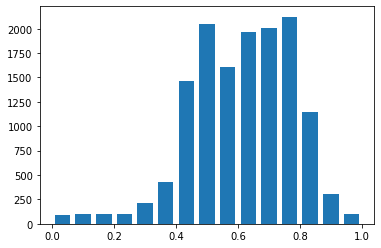

In [5]:
num_bins= 15
hist, bins=np.histogram(data['angle'],num_bins)
center= (bins[:-1]+ bins[1:])*0.5
print(bins)
plt.bar(center,hist,width=0.05)

In [6]:
print(data.iloc[3])
def load_img_steering(datadir, df):
  image_path = []
  angle = []
  #speed = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_id = indexed_data[0]
    image_path.append(os.path.join(datadir,image_id))
    angle.append(float(indexed_data[1]))
    #speed.append((indexed_data[2]))
  image_paths = np.asarray(image_path)
  angles = np.asarray(angle)
  #speeds= np.asarray(speed)
  image_ids= np.asarray(image_id)
  return image_paths, angles

image_id    4.png
angle       0.625
speed           1
Name: 3, dtype: object


In [7]:
image_paths, angles= load_img_steering(datadir + '/training_data/training_data', data)
image_paths

array(['cardata/training_data/training_data/1.png',
       'cardata/training_data/training_data/2.png',
       'cardata/training_data/training_data/3.png', ...,
       'cardata/training_data/training_data/13796.png',
       'cardata/training_data/training_data/13797.png',
       'cardata/training_data/training_data/13798.png'], dtype='<U45')

In [9]:
X_train,X_valid,y_train,y_valid= train_test_split(data,angles,test_size=0.2,random_state=3)




Text(0.5, 1.0, 'Validation set')

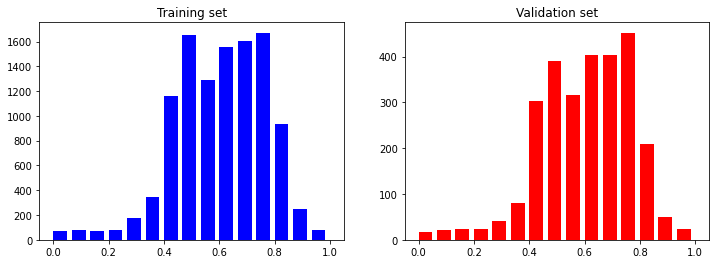

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [11]:
def img_preprocess(img):
    img=mpimg.imread(img)
    img= np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    return img

In [ ]:
import glob
    
    # loop the image folder
image_files = glob.glob(datadir+"*.csv")
for idx, file in enumerate(image_files):
		print(file)
		

In [12]:
image_paths[0]

'cardata/training_data/training_data/1.png'

In [13]:
image1 = image_paths[10]
original_image = mpimg.imread(image_paths[10])
preprocessed_image = img_preprocess(image1)

Text(0.5, 1.0, 'Preprocessed Image')

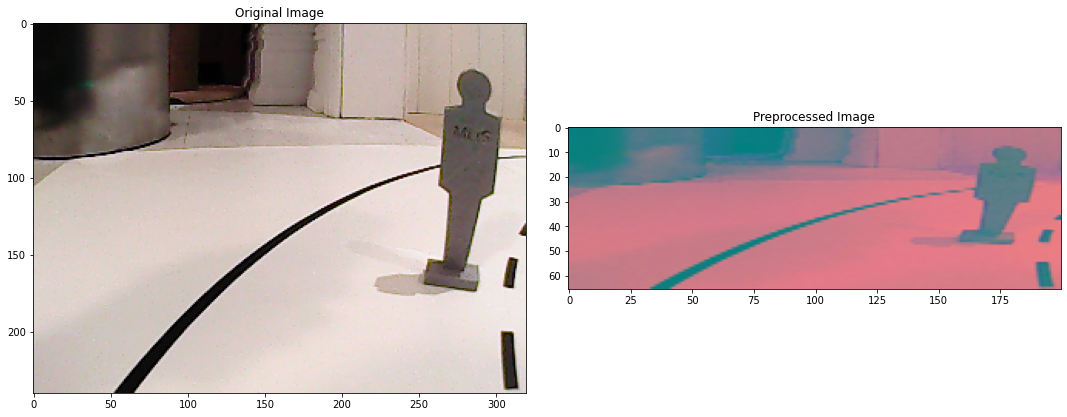

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [15]:
y_train

array([0.625 , 0.6875, 0.6875, ..., 0.875 , 0.6875, 0.5   ])

In [16]:
# this line is to aplly img_preprocess function to all X_train images
X_train=np.array(list(map(img_preprocess, X_train)))

(11034, 66, 200, 3)


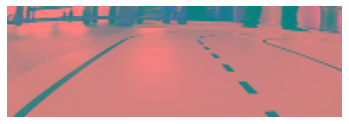

In [17]:
# to see map function works correctly
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [18]:
X_valid=np.array(list(map(img_preprocess, X_valid)))


In [19]:
def nvidia_model():
 
  model = Sequential()
 
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='relu'))
 
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='relu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(Dropout(0.5))
 
 
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
 
 
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation ='relu'))
  model.add(Dense(1))
 
 
  optimizer= Adam(learning_rate=1e-3)
  model.compile(loss='mse', optimizer=optimizer)

  return model

In [20]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [21]:
y_valid

array([0.5625, 0.75  , 0.5625, ..., 0.5   , 1.    , 0.3125])

In [22]:
history= model.fit(X_train,y_train, epochs=10, validation_data=(X_valid,y_valid),batch_size=100, verbose=1, shuffle=1)

Epoch 1/10
111/111 [==============================] - 79s 697ms/step - loss: 0.0554 - val_loss: 0.0340
Epoch 2/10
111/111 [==============================] - 77s 697ms/step - loss: 0.0268 - val_loss: 0.0190
Epoch 3/10
111/111 [==============================] - 85s 771ms/step - loss: 0.0198 - val_loss: 0.0141
Epoch 4/10
111/111 [==============================] - 76s 685ms/step - loss: 0.0139 - val_loss: 0.0112
Epoch 5/10
111/111 [==============================] - 86s 774ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 6/10
111/111 [==============================] - 85s 764ms/step - loss: 0.0099 - val_loss: 0.0081
Epoch 7/10
111/111 [==============================] - 82s 738ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 8/10
111/111 [==============================] - 82s 736ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 9/10
111/111 [==============================] - 84s 754ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 10/10
111/111 [==============================] - 87s 784ms/step - l

Text(0.5, 0, 'Epoch')

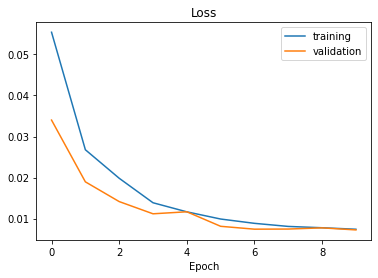

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [24]:
model.save('modelfirst.h5')
from google.colab import files
files.download('modelfirst.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score

# this function to see the performance of our model, you can check the images below
def summarize_prediction(Y_true, Y_pred):
    
    mse = mean_squared_error(Y_true, Y_pred)
    r_squared = r2_score(Y_true, Y_pred)
    
    print(f'mse       = {mse:.2}')
    print(f'r_squared = {r_squared:.2%}')
    print()

In [41]:
def predict_and_summarize(X, Y):
    model = load_model(f'{model_output_dir}/model.h5')
    Y_pred = model.predict(X)
    summarize_prediction(Y, Y_pred)
    return Y_pred

In [42]:
# Mount my Google Drive.  It will ask for an authenticate code
from google.colab import drive
drive.mount('/content/gdrive')
model_output_dir = '/content/gdrive/My Drive/Colab Notebooks'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [63]:
#I've used X_valid and y_valid to work this function and produce y_pred. Then below we can see predicted and actual angles.
# when we need to submit results to kaggle we need to use TEST_DATA....
y_pred = predict_and_summarize(X_valid, y_valid)


mse       = 0.0072
r_squared = 70.05%



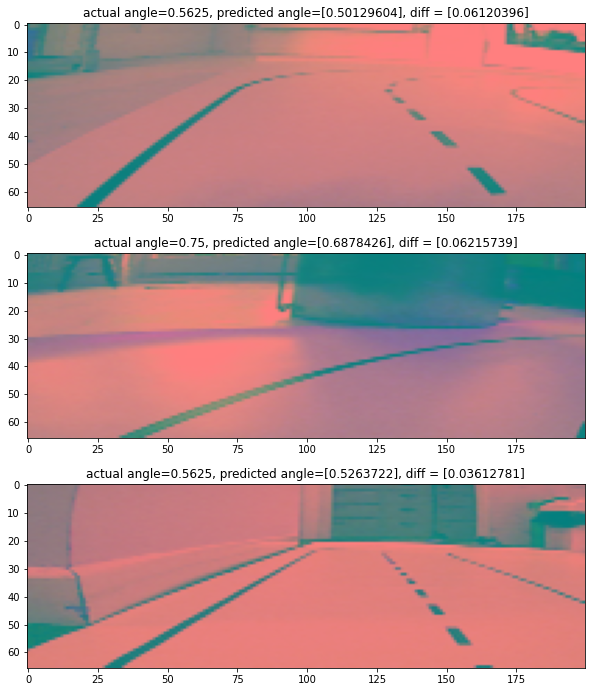

In [64]:
n_tests_show = 3
fig, axes = plt.subplots(n_tests_show, 1, figsize=(10, 4 * n_tests_show))
for i in range(n_tests_show):
    axes[i].imshow(X_valid[i])
    axes[i].set_title(f"actual angle={y_valid[i]}, predicted angle={(y_pred[i])}, diff = {(y_valid[i])-y_pred[i]}")

# results look acceptable for now... I'll improve images process function and i hope results will be much better